In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("retail_sales_dataset_simulated.csv")

# Basic Exploration
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nDescription:\n", df.describe())

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

Shape: (70000, 7)

Head:
    order_id  customer_id   price  quantity  order_date region    product
0         1         4174  456.97         9  2022-08-01    NaN     Widget
1         2         4507   58.03         9  2022-05-30    NaN     Widget
2         3         1860  373.24         9  2022-03-11  South  Doohickey
3         4         2294  291.78         2  2022-10-14  South     Widget
4         5         2130  182.30         4  2022-05-14   EAST     Widget

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     70000 non-null  int64  
 1   customer_id  70000 non-null  int64  
 2   price        69300 non-null  float64
 3   quantity     70000 non-null  int64  
 4   order_date   70000 non-null  object 
 5   region       61553 non-null  object 
 6   product      70000 non-null  object 
dtypes: float64(1), int64(3), object(3)
me

In [7]:
# Drop rows where price is null
df = df.dropna(subset=["price"])

# Standardize region
df["region"] = df["region"].str.strip().str.title()

# Drop remaining rows with missing region
df = df.dropna(subset=["region"])

# Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Create total_sales column
df["total_sales"] = df["price"] * df["quantity"]

# Confirm changes
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 60930 entries, 2 to 69997
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     60930 non-null  int64         
 1   customer_id  60930 non-null  int64         
 2   price        60930 non-null  float64       
 3   quantity     60930 non-null  int64         
 4   order_date   60930 non-null  datetime64[ns]
 5   region       60930 non-null  object        
 6   product      60930 non-null  object        
 7   total_sales  60930 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 4.2+ MB
   order_id  customer_id   price  quantity order_date region    product  \
2         3         1860  373.24         9 2022-03-11  South  Doohickey   
3         4         2294  291.78         2 2022-10-14  South     Widget   
4         5         2130  182.30         4 2022-05-14   East     Widget   
5         6         2095  

In [ ]:
# Drop rows with invalid dates
df = df.dropna(subset=["order_date"])

# Create 'high_value_order' feature
df["high_value_order"] = df["total_sales"] > 1000

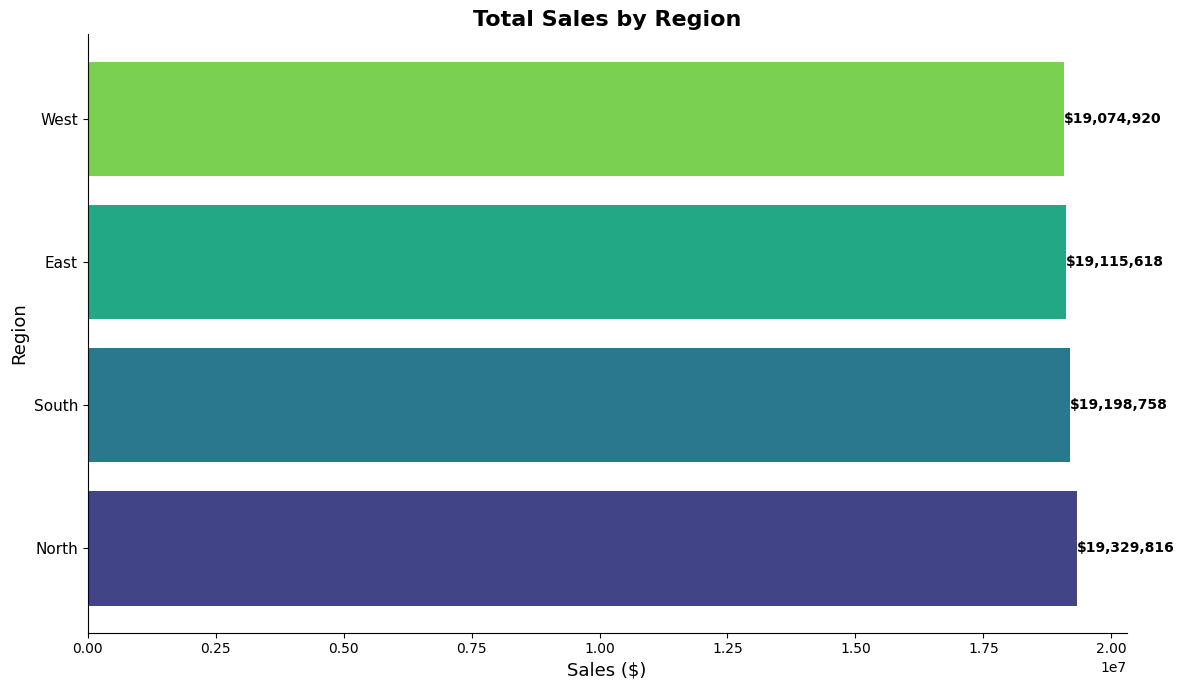

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort regions by sales descending
region_sales = df.groupby("region")["total_sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
colors = sns.color_palette("viridis", len(region_sales))
bars = plt.barh(region_sales.index, region_sales.values, color=colors)

for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2, 
        f"${bar.get_width():,.0f}", 
        va='center', ha='left', fontsize=10, fontweight='bold'
    )

plt.title("Total Sales by Region", fontsize=16, fontweight='bold')
plt.xlabel("Sales ($)", fontsize=13)
plt.ylabel("Region", fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
summary = df.groupby("region").agg(
    total_sales=("total_sales", "sum"),
    high_value_orders=("high_value_order", "sum"),
    order_count=("order_id", "count")
)

# Calculate percent high-value
summary["percent_high_value"] = (summary["high_value_orders"] / summary["order_count"]) * 100

# Sort by revenue
summary = summary.sort_values("total_sales", ascending=False)

# Rounding Format
summary = summary.round({"total_sales": 2, "percent_high_value": 2})

summary

,total_sales,high_value_orders,order_count,percent_high_value
region,,,,
North,19329816.22,7482,15349,48.75
South,19198757.54,7386,15275,48.35
East,19115618.39,7396,15186,48.70
West,19074919.56,7300,15120,48.28
